# Import Libraries

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Statistic on Sexual Assault

In [121]:
## Used for plotting the bar charts
def plot_bars(ax, categories, counts, colors, labels):
    ax.bar(categories, counts, color=colors)
    ## Legend colors
    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
    ax.legend(handles, labels, loc="upper right", fontsize='small')
    ax.tick_params(labelrotation=10)

def sa_stats(df):
    # Filtering data for rape cases
    rapeCases = df[["Crm Cd Desc", "Vict Sex"]]
    rapeCases = rapeCases[rapeCases["Crm Cd Desc"].str.contains("RAPE", case=False)]

    ## Counting occurrences of rape cases
    rapeValues = rapeCases.value_counts()

    ## Labels, counts, colors, legend
    categories = [f'{x[0]} - {x[1]}' for x in list(rapeValues.keys())]
    counts = list(rapeValues.values)
    colors = ["#007FFF" if x[1] == "M" else "#FF10F0" for x in list(rapeValues.keys())]
    categories_w_counts = [f'{categories[i]} : {counts[i]}' for i in range(len(categories))]

    ## Subplot creation
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('SA Victims')

    ## Plotting Bar Charts
    for i in range(2):
        for j in range(2):
            ax = axs[i, j]
            start_idx = i * 2 + j * 2
            end_idx = min(start_idx + 2, len(categories))
            plot_bars(ax, categories[start_idx:end_idx], counts[start_idx:end_idx], colors[start_idx:end_idx], categories_w_counts[start_idx:end_idx])


    ## Pie Chart
    explode = [0, 0, 0.1, 0.3]
    colors = ["#EDB9C8", "#FF10F0", "#007FFF", "#000"]
    stats = [round(count/sum(counts), 3) for count in counts]
    cats = [f'{categories[i]} : {stats[i]}' for i in range(len(categories))]

    axs[1, 1].pie(counts, colors=colors, startangle=90, explode=explode, shadow=False)
    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]

    ## Legend in top right, with slight label rotation
    axs[1, 1].legend(handles, cats, loc="upper right", fontsize='small')
    axs[1, 1].tick_params(labelrotation=10)

    plt.show()

# Statistic on Age

In [122]:
def age_crimes(df):
    invStatus = df["Status Desc"].value_counts()

    total = sum(invStatus)
    print(invStatus)
    print("*" * 35)
    print(f'Total Crimes: {total}')
    
    ## Print Statistics
    print(f'{round((sum(invStatus[3:5])/total)*100, 2)}% of Cases are Juvenile Related')
    print(f'{round((sum(invStatus[2:4])/total)*100, 2)}% of Cases Resulted in Arrest')
    print(f'{invStatus[5]} Cases are Unknown')

    # Labels, Colors, Explode
    sizes = [(x / total) * 100 for x in invStatus]
    labels = [f'{x}: {y:.3f}%' for x, y in zip(invStatus.index, sizes)]
    colors = ['#355C7D', '#6C5B7B', '#C06C84', '#F67280', '#F8B195', '#000']
    explode = (0.1, 0, 0, 0.1, 0.2, 0.8)


    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=90)
    plt.axis('equal')  ## Ensure plot is a circle
    plt.title('Crimes Statistic')
    plt.legend(loc="best", bbox_to_anchor=(1, 0.5))

    plt.show()


# All crimes plotted

In [123]:
def all_crimes(df):
    crime_counts = df["Crm Cd Desc"].value_counts()

    rates = {}
    for k in crime_counts.keys():
        rates[k] = crime_counts[k]/sum(crime_counts)

    sorted_dict = dict(sorted(rates.items(), key=operator.itemgetter(1)))

    sub_dict = dict(list(sorted_dict.items())[:35])
    sub_dict2 = dict(list(sorted_dict.items())[34:75])
    sub_dict3 = dict(list(sorted_dict.items())[74:105])
    sub_dict4 = dict(list(sorted_dict.items())[104:])

    # Create subplots and plot the data
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Plotting for subplot 1
    axs[0, 0].bar(range(len(sub_dict)), sub_dict.values())
    axs[0, 0].set_title('1-35')

    # Plotting for subplot 2
    axs[0, 1].bar(range(len(sub_dict2)), sub_dict2.values())
    axs[0, 1].set_title('35-75')

    # Plotting for subplot 3
    axs[1, 0].bar(range(len(sub_dict3)), sub_dict3.values())
    axs[1, 0].set_title('75-105')

    # Plotting for subplot 4
    axs[1, 1].bar(range(len(sub_dict4)), sub_dict4.values())
    axs[1, 1].set_title('105-135')


    plt.figure(figsize=(100, 80))
    plt.tight_layout()
    plt.show()

# Exectute Basic Statistics

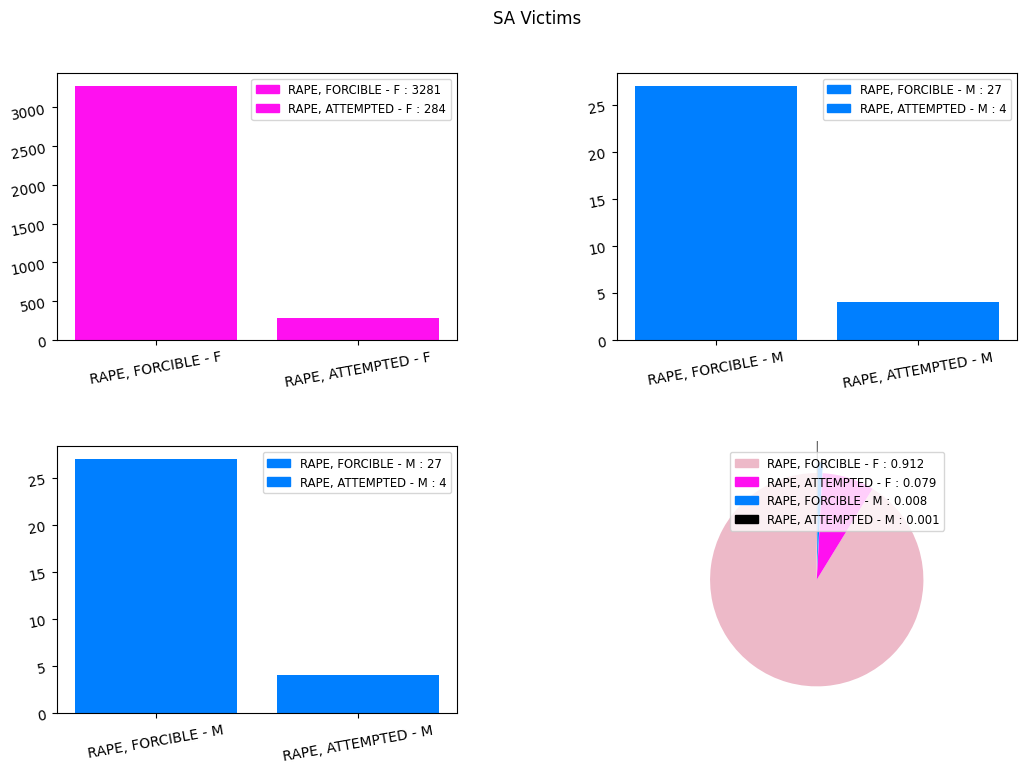

Status Desc
Invest Cont     485073
Adult Other      82628
Adult Arrest     56878
Juv Arrest        2106
Juv Other         1223
UNK                  4
Name: count, dtype: int64
***********************************
Total Crimes: 627912
0.53% of Cases are Juvenile Related
9.39% of Cases Resulted in Arrest
4 Cases are Unknown


/var/folders/1r/nhfv97zj4b1dcm5q0rvk4nt00000gn/T/ipykernel_6086/1884068514.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{invStatus[5]} Cases are Unknown')


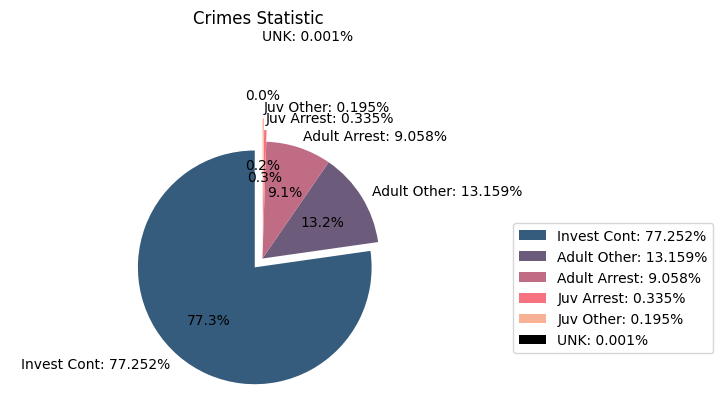

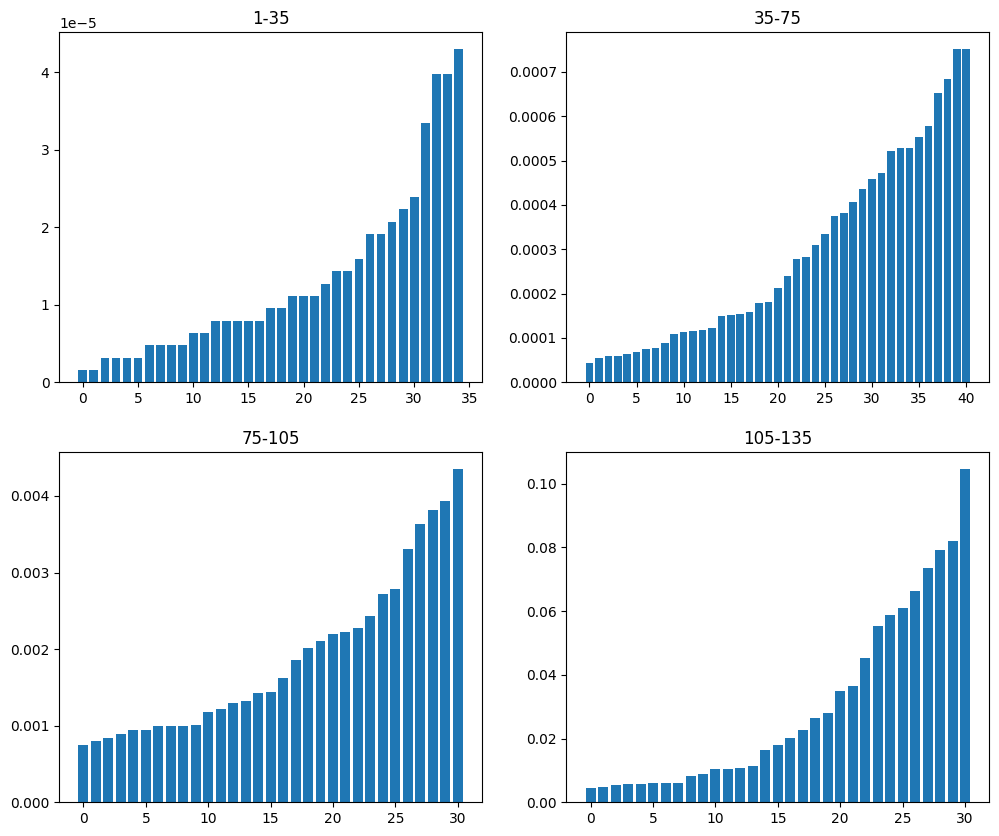

<Figure size 10000x8000 with 0 Axes>

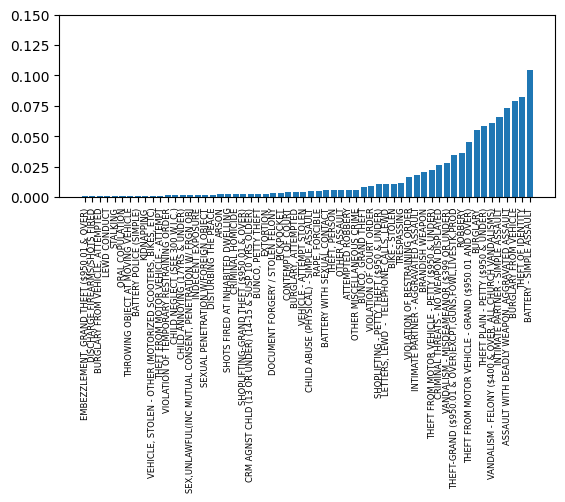

In [125]:
if __name__ == "__main__":
    df = pd.read_csv("Data/RefinedFile.csv")

    sa_stats(df)
    age_crimes(df)
    all_crimes(df)
    animate_crimes(df)

# Top 60 Crimes and their occurence ratio, with Animation (for Fun)

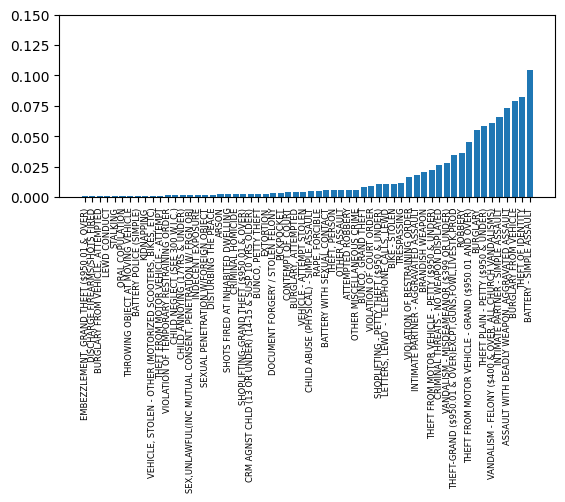

In [127]:
df = pd.read_csv("Data/RefinedFile.csv")
## Get total count for each crimes
crime_count = df["Crm Cd Desc"].value_counts()

## Calculate rates, sort them, take top 60
rates = {k: crime_count[k] / sum(crime_count) for k in crime_count.keys()}
sorted_dict = dict(sorted(rates.items(), key=operator.itemgetter(1)))
sub_dict = dict(list(sorted_dict.items())[-60:])

## Set up the figure and axis
fig, ax = plt.subplots()
bars = ax.bar(range(len(sub_dict)), [0] * len(sub_dict), align='center', bottom=0)
plt.ylim(0, 0.15)
plt.xticks(range(len(sub_dict)), list(sub_dict.keys()), rotation=90, fontsize=6)
plt.subplots_adjust(bottom=0.5)
plt.figure(figsize=(100, 80))

## Update function for animation
def update(frame):
    key = list(sub_dict.keys())[frame]
    val = sub_dict[key]
    bars[frame].set_height(val)

## Create and display the animation
anim = FuncAnimation(fig, update, frames=len(sub_dict), interval=200)
HTML(anim.to_jshtml())
